In [1]:
%matplotlib inline
from allensdk.core.cell_types_cache import CellTypesCache
import matplotlib as mpl # I don't think I'm using this
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import h5py, os

In [2]:
df1=np.load('cells_dataframe.h5')
#df_PV=df1(df1.Cre_Line=='Pvalb-IRES-Cre').copy()
ctc = CellTypesCache(manifest_file='e:\cell_types\manifest.json')

In [5]:
df1.mouse_line[0]

'Sst-IRES-Cre'

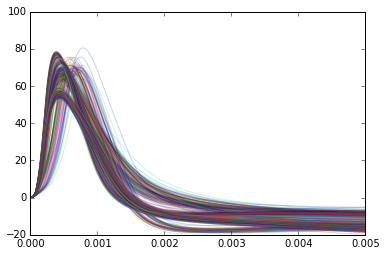

In [70]:
for j in range (0,10):
    features = ctc.get_ephys_sweeps(df1.id[j])
    for f in range(len(features)):
        if features[f]['stimulus_name'] == 'Noise 1' or features[f]['stimulus_name'] == 'Noise 2':
            data_set = ctc.get_ephys_data(df1.id[j])
            g = h5py.File(data_set.file_name,'r')
            spike_times = g['analysis']['aibs_spike_times']['Sweep_%d' % features[f]['sweep_number']].value
            g.close()
            time_window = 0.005
            sweep_data = data_set.get_sweep(features[f]['sweep_number'])
            for i in spike_times:
                if i >= 10.02 and i <= 13.02:
                    v = np.copy(sweep_data["response"]) # in V
                    v *= 1e3 # to mV
                    v[:] = [x +(-v[int(i*sampling_rate)]) for x in v]
                    v=v[int(i*sampling_rate):int((i+time_window)*sampling_rate)]
                    t = np.arange(0, len(v)) * (1.0 / sampling_rate)
                    plt.plot(t,v,alpha = .2)
                #plt.plot(t,color='gray')

In [76]:
count = 0
for j in range (0,10):
    features = ctc.get_ephys_sweeps(df1.id[j])
    for f in range(len(features)):
        if features[f]['stimulus_name'] == 'Noise 1' or features[f]['stimulus_name'] == 'Noise 2':
            data_set = ctc.get_ephys_data(df1.id[j])
            g = h5py.File(data_set.file_name,'r')
            spike_times = g['analysis']['aibs_spike_times']['Sweep_%d' % features[f]['sweep_number']].value
            g.close()
            time_window = 0.005
            sweep_data = data_set.get_sweep(features[f]['sweep_number'])
            for i in spike_times:
                if i >= 10.02:
                    if i >13.02:
                        break
                    count += 1

In [77]:
print count

472


In [81]:
s=0
noise_array = np.empty((472,1000))
for j in range (0,10):
    features = ctc.get_ephys_sweeps(df1.id[j])
    for f in range(len(features)):
        if features[f]['stimulus_name'] == 'Noise 1' or features[f]['stimulus_name'] == 'Noise 2':
            data_set = ctc.get_ephys_data(df1.id[j])
            g = h5py.File(data_set.file_name,'r')
            spike_times = g['analysis']['aibs_spike_times']['Sweep_%d' % features[f]['sweep_number']].value
            g.close()
            time_window = 0.005
            sweep_data = data_set.get_sweep(features[f]['sweep_number'])
            for i in spike_times:
                if i >= 10.02:
                    if i >13.02:
                        break
                    v = np.copy(sweep_data["response"]) # in V
                    v *= 1e3 # to mV
                    v[:] = [x +(-v[int(i*sampling_rate)]) for x in v]
                    v=v[int(i*sampling_rate):int(i*sampling_rate)+1000]
                    noise_array[s,:] =v
                    s += 1

In [82]:
print s


472


In [83]:
np.save('noise_test.npy',noise_array)

In [109]:
data = np.load('noise_test.npy')

In [110]:
data.shape

(472L, 1000L)

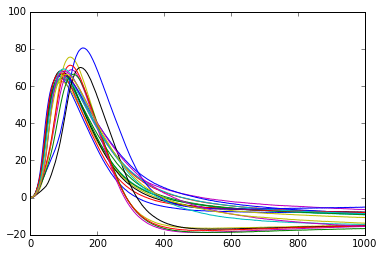

In [111]:
# plot out some traces
r = plt.plot(data[0:200:10,:].T)

In [112]:
# initialized and run decomposition
pca = PCA(10)
pca.fit(data)
decomp = pca.fit_transform(data)
sigma = np.sqrt(pca.explained_variance_)

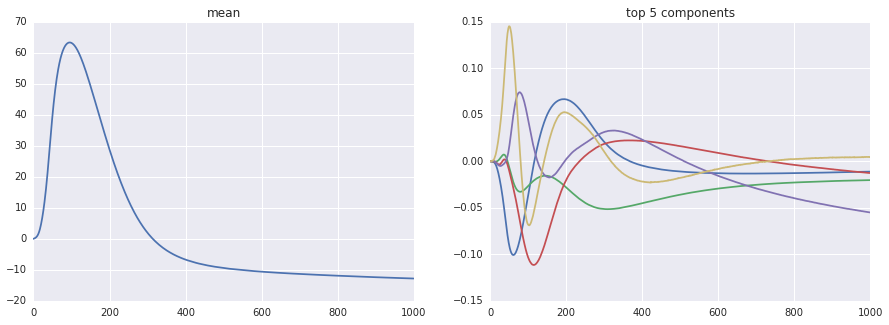

In [127]:
# plot mean and first 5 components
import seaborn
f,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
ax1.set_title('mean')
ax2.set_title('top 5 components')
ax1.plot(pca.mean_)
ax2.plot(pca.components_[0:5].T)

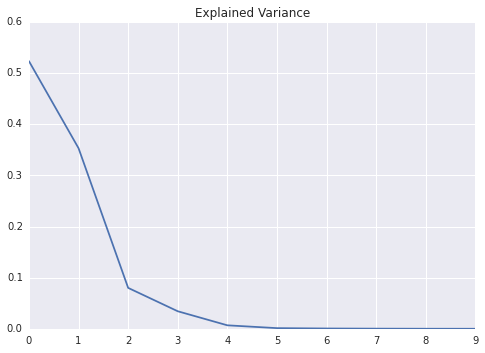

In [128]:
plt.plot(pca.explained_variance_ratio_)
plt.title('Explained Variance')

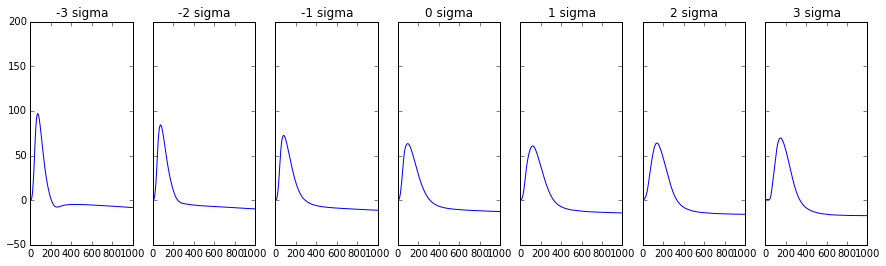

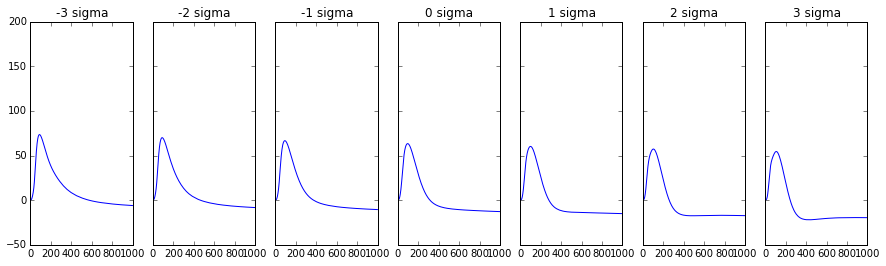

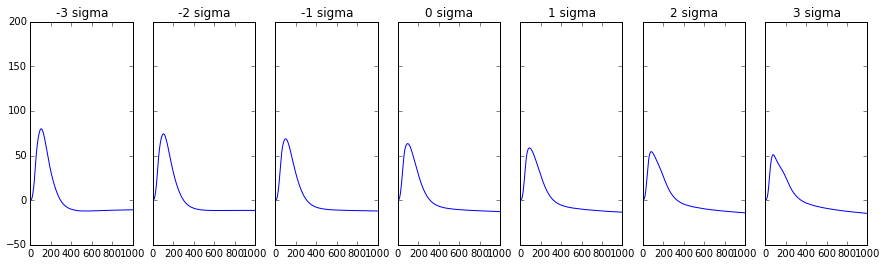

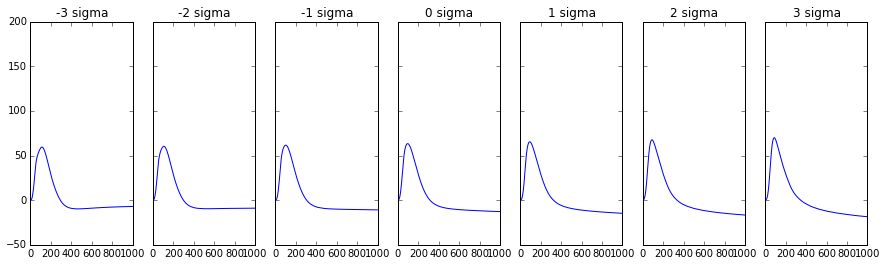

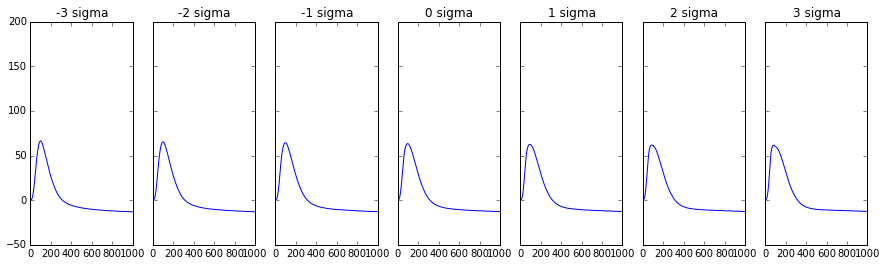

In [115]:
for c in range(5):
    f,ax = plt.subplots(1,7,sharey=True,figsize=(15,4))
    for idx, s in enumerate(range(-3,4)) :
        ax[idx].plot(pca.mean_ + s*sigma[c]*pca.components_[c])
        ax[idx].set_title('%d sigma' % s)
        #ax[idx].set_xlim(0,2600)
        ax[idx].set_ylim(-50,200)

In [142]:
count = 0
for j in range(len(df1)):
    if df1['id'].iloc[j] == 313861934:
        break
    features = ctc.get_ephys_sweeps(df1['id'].iloc[j])
    data_set = ctc.get_ephys_data(df1['id'].iloc[j])
    g = h5py.File(data_set.file_name,'r')
    for f in range(len(features)):
        if features[f]['stimulus_name'] == 'Noise 1' or features[f]['stimulus_name'] == 'Noise 2':
            spike_times = g['analysis']['aibs_spike_times']['Sweep_%d' % features[f]['sweep_number']].value
            time_window = 0.005
            sweep_data = data_set.get_sweep(features[f]['sweep_number'])
            for i in spike_times:
                if i >= 10.02:
                    if i >13.02:
                        break
                    count += 1
    g.close()
print count

26265


In [ ]:
s=0
noise_array = np.empty((26265,1000))
for j in range(len(df1)):
    if df1['id'].iloc[j] == 313861934:
        break
    features = ctc.get_ephys_sweeps(df1.id[j])
    data_set = ctc.get_ephys_data(df1['id'].iloc[j])
    g = h5py.File(data_set.file_name,'r')
    for f in range(len(features)):
        if features[f]['stimulus_name'] == 'Noise 1' or features[f]['stimulus_name'] == 'Noise 2':
            spike_times = g['analysis']['aibs_spike_times']['Sweep_%d' % features[f]['sweep_number']].value
            time_window = 0.005
            sweep_data = data_set.get_sweep(features[f]['sweep_number'])
            for i in spike_times:
                if i >= 10.02:
                    if i >13.02:
                        break
                    v = np.copy(sweep_data["response"]) # in V
                    v *= 1e3 # to mV
                    v[:] = [x +(-v[int(i*sampling_rate)]) for x in v]
                    v=v[int(i*sampling_rate):int(i*sampling_rate)+1000]
                    noise_array[s,:] =v
                    s += 1
    g.close()

In [105]:
print features[f]

{u'stimulus_interval': 5.0, u'stimulus_name': u'Noise 2', u'num_spikes': 0, u'id': 396302316, u'pre_vm_mv': -74.7685775756836, u'stimulus_duration': 18.999995, u'stimulus_start_time': 1.92, u'slow_noise_rms_mv': 0.181581318378448, u'peak_deflection': 0.0, u'bridge_balance_mohm': 12.3931617736816, u'stimulus_units': u'pA', u'specimen_id': 313861934, u'sweep_number': 43, u'vm_delta_mv': 0.773429870605469, u'leak_pa': 0.0, u'pre_noise_rms_mv': 0.0447860546410084, u'post_noise_rms_mv': 0.0448848530650139, u'post_vm_mv': -75.5420074462891, u'stimulus_description': u'C1NSSEED_2141203[0]', u'stimulus_absolute_amplitude': 164.999999774373, u'slow_vm_mv': -74.7685775756836, u'stimulus_relative_amplitude': 0.7}


In [106]:
print sweep_data

{'stimulus': array([ 0.,  0.,  0., ...,  0.,  0.,  0.]), 'index_range': (150000, 4604000), 'response': array([-0.07775   , -0.07778125, -0.07775   , ..., -0.078     ,
       -0.078     , -0.078     ]), 'sampling_rate': 200000.0}


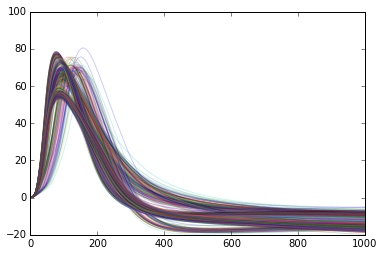

In [121]:
# plot out some traces
r = plt.plot(data.T,alpha=.2)